In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(rc = {'figure.figsize':(12,7)})

In [31]:
df = pd.read_csv('./data/monday.csv', delimiter = ';')

In [32]:
df.head()

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [33]:
x = df.groupby('location')[['customer_no']].count()

In [34]:
x

,customer_no
location,
checkout,1437
dairy,895
drinks,797
fruit,1005
spices,750


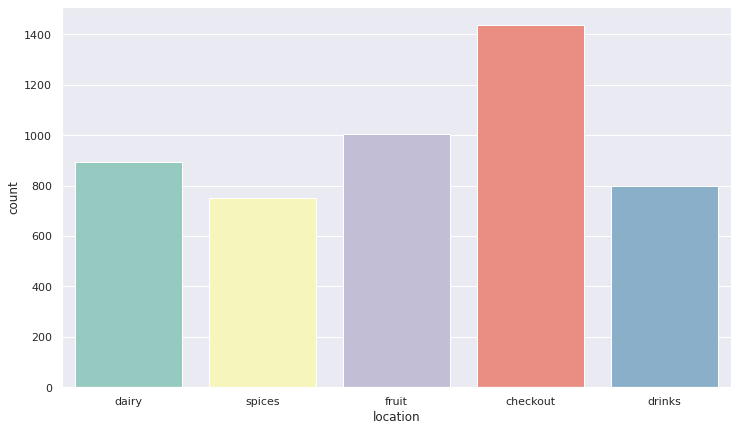

In [37]:
sns.countplot(x = 'location', data =df, palette = 'Set3')

In [45]:
df['timestamp']=pd.to_datetime(df['timestamp'])
df['timestamp']

0      2019-09-02 07:03:00
1      2019-09-02 07:03:00
2      2019-09-02 07:04:00
3      2019-09-02 07:04:00
4      2019-09-02 07:04:00
               ...        
4879   2019-09-02 21:49:00
4880   2019-09-02 21:49:00
4881   2019-09-02 21:49:00
4882   2019-09-02 21:50:00
4883   2019-09-02 21:50:00
Name: timestamp, Length: 4884, dtype: datetime64[ns]

In [51]:
y = df.groupby(['location',pd.Grouper(key = 'timestamp',freq='1H')])

In [63]:
y_new = y.count().unstack()

In [64]:
y_new

customer_no                                          \
timestamp 2019-09-02 07:00:00 2019-09-02 08:00:00 2019-09-02 09:00:00   
location                                                                
checkout                   92                 112                  85   
dairy                      59                  68                  50   
drinks                     60                  65                  57   
fruit                      54                  68                  76   
spices                     52                  51                  40   

                                                                       \
timestamp 2019-09-02 10:00:00 2019-09-02 11:00:00 2019-09-02 12:00:00   
location                                                                
checkout                   90                  55                  73   
dairy                      58                  36                  55   
drinks                     35                  24                  37   
fruit                      47                  41                  54   
spices                     52                  33                  46   

                                                                       \
timestamp 2019-09-02 13:00:00 2019-09-02 14:00:00 2019-09-02 15:00:00   
location                                                                
checkout                  120                  90                  94   
dairy                      76                  58                  67   
drinks                     50                  43                  48   
fruit                      95                  64                  79   
spices                     71                  50                  54   

                                                                       \
timestamp 2019-09-02 16:00:00 2019-09-02 17:00:00 2019-09-02 18:00:00   
location                                                                
checkout                   86                 122                 128   
dairy                      49                  79                  87   
drinks                     54                  69                  81   
fruit                      66                  90                  83   
spices                     52                  50                  70   

                                                                       
timestamp 2019-09-02 19:00:00 2019-09-02 20:00:00 2019-09-02 21:00:00  
location                                                               
checkout                  129                 109                  52  
dairy                      64                  67                  22  
drinks                     65                  81                  28  
fruit                      87                  68                  33  
spices                     59                  52                  18

In [60]:
#?

### Display the number of customers at checkout over time

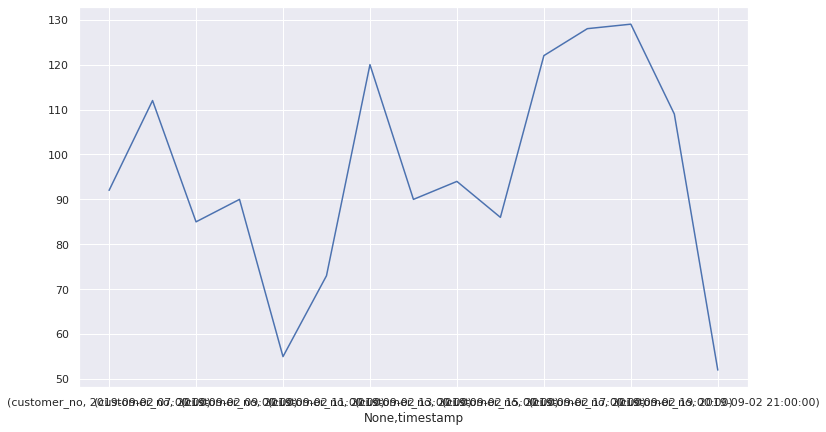

In [69]:
row = y_new.iloc[0]
row.plot(kind='line')

### Calculate the time each customer spent in the market

In [87]:
difference=df.groupby('customer_no')[['timestamp']].agg(lambda x: x.max() - x.min())


In [88]:
difference

,timestamp
customer_no,
1,00:02:00
2,00:03:00
3,00:02:00
4,00:04:00
5,00:01:00
...,...
1443,00:01:00
1444,00:01:00
1445,00:00:00


### Calculate the total number of customers in the supermarket over time.